# Fetal Health Classification

A base de dados é composta 2126 resultados de cardiotocogramas (CTG), analisados e classificados por três obstetras em três categorias: 

1. Normal
2. Suspeita 
3. Patológica

## Importação de bibliotecas

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

## Importação dos dados

In [76]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Pré-processamento

### Verificação dos tipos, quantidades e ausências de dados

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
baseline value                                            2126 non-null float64
accelerations                                             2126 non-null float64
fetal_movement                                            2126 non-null float64
uterine_contractions                                      2126 non-null float64
light_decelerations                                       2126 non-null float64
severe_decelerations                                      2126 non-null float64
prolongued_decelerations                                  2126 non-null float64
abnormal_short_term_variability                           2126 non-null float64
mean_value_of_short_term_variability                      2126 non-null float64
percentage_of_time_with_abnormal_long_term_variability    2126 non-null float64
mean_value_of_long_term_variability                       2126 non-null float64
histogram_wid

A base de dados é composta 22 atributos, todos númericos e sem informações ausentes.

### Verificação da existência de duplicatas

In [78]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
baseline value                                            2113 non-null float64
accelerations                                             2113 non-null float64
fetal_movement                                            2113 non-null float64
uterine_contractions                                      2113 non-null float64
light_decelerations                                       2113 non-null float64
severe_decelerations                                      2113 non-null float64
prolongued_decelerations                                  2113 non-null float64
abnormal_short_term_variability                           2113 non-null float64
mean_value_of_short_term_variability                      2113 non-null float64
percentage_of_time_with_abnormal_long_term_variability    2113 non-null float64
mean_value_of_long_term_variability                       2113 non-null float64
histogram_wid

Foram encontradas e deletadas 13 instâncias duplicadas.

### Estatística descritiva dos dados

In [79]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


A média 1,303833 do atributo alvo *fetal_health* indica que o conjunto de dados está desbalanceado, com o domínio da classe 1 (normal).

### Visualização do conjunto de dados

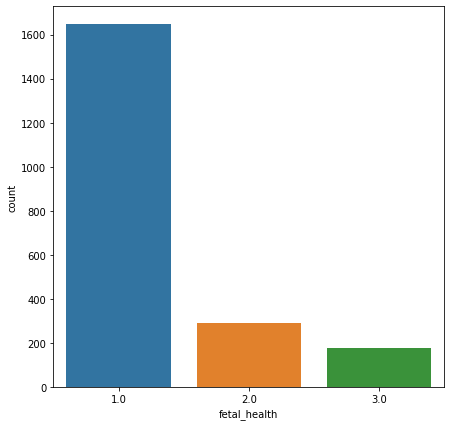

In [80]:
c = sns.countplot(df.fetal_health)
plt.gca()

Há aproximadamente o triplo de instâncias da classe 1 (normal) em relação as classes 2 (suspeita) e 3 (patológica).

### Análise da correlação entre os atributos da amostra

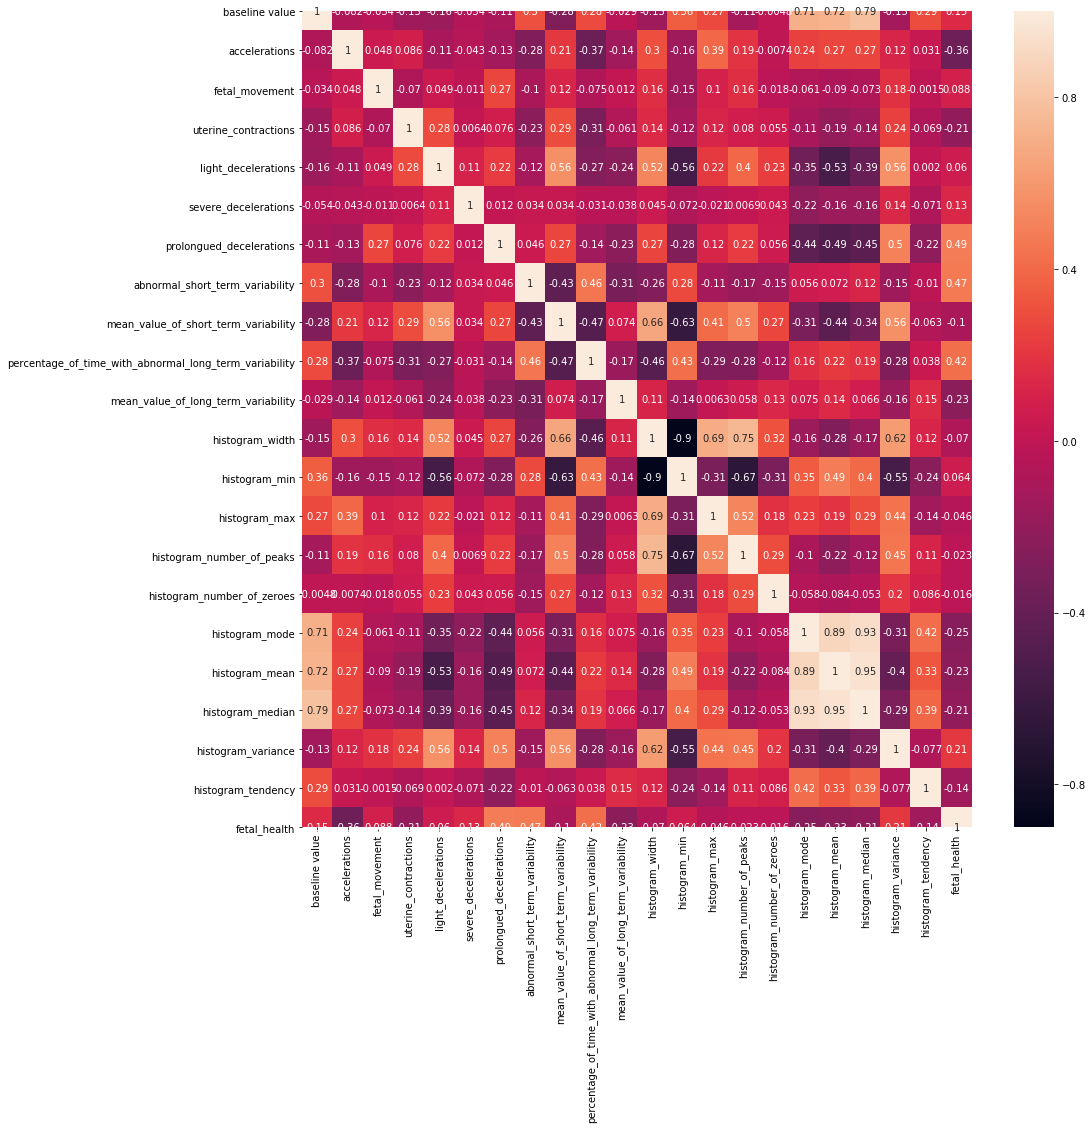

In [94]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

As maiores correlações estão presentes entre os atributos referentes aos histogramas da média, moda e mediana.

### Normalização dos dados

In [90]:
columns = [
    'baseline_value',
    'accelerations',
    'fetal_movement',
    'uterine_contractions',
    'light_decelerations',
    'severe_decelerations',
    'prolongued_decelerations',       
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',    
    'mean_value_of_long_term_variability', 
    'histogram_width',
    'histogram_min',
    'histogram_max', 
    'histogram_number_of_peaks',
    'histogram_number_of_zeroes', 
    'histogram_mode',
    'histogram_mean',
    'histogram_median',
    'histogram_variance',
    'histogram_tendency'
]

x = pd.DataFrame(StandardScaler().fit_transform(df.drop(['fetal_health'], axis = 1),), columns = columns)
x.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352782,-0.823776,-0.203392,-1.492245,-0.641203,-0.057653,-0.26964,1.514300,-0.944425,1.811237,...,-0.167577,-1.067985,-2.123628,-0.703885,-0.460150,-1.064409,0.153804,-1.180575,1.863218,1.115505
1,-0.132665,0.726444,-0.203392,0.548605,0.370643,-0.057653,-0.26964,-1.746497,0.865205,-0.534294,...,1.524797,-0.864976,1.889542,0.651603,0.953071,0.216224,0.089729,0.131985,-0.237919,-0.521344
2,-0.030989,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,0.865205,-0.534294,...,1.524797,-0.864976,1.889542,0.312731,0.953071,0.216224,0.025654,-0.006179,-0.203474,-0.521344
3,0.070687,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,1.191450,-1.372500,0.328865,2.345964,-0.460150,-0.027706,-0.038421,-0.075261,-0.203474,1.115505
4,-0.132665,0.984814,-0.203392,1.228888,-0.641203,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,1.191450,-1.372500,0.328865,1.668219,-0.460150,-0.027706,0.089729,-0.006179,-0.272364,1.115505


In [91]:
y = df.fetal_health
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2113, dtype: float64